In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data sets/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
def check_data(df):
    print('SHAPE' .center(70,'-'))
    print(f"Rows: {df.shape[0]}")
    print(f"Columns: {df.shape[1]}")
    print(" Types ".center(70,'-'))
    print(df.dtypes)
    print("Missing Values".center(70,'-'))
    print(df.isnull().sum())

check_data(df)

--------------------------------SHAPE---------------------------------
Rows: 8807
Columns: 12
------------------------------- Types --------------------------------
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
----------------------------Missing Values----------------------------
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [5]:
# replace empty values with "no data"
df['cast'].replace(np.nan,'no data',inplace=True)
df['director'].replace(np.nan,'no data',inplace=True)

In [6]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
df.drop('show_id',axis=1,inplace=True)

In [8]:
print(df.isnull().sum())
print(df.duplicated().sum())

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
0


In [9]:
# convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'])

In [10]:
# convert to numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

C:\Users\Rowaim Safdar\AppData\Local\Temp\ipykernel_20136\1343473913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['release_year'], palette = 'crest_r')


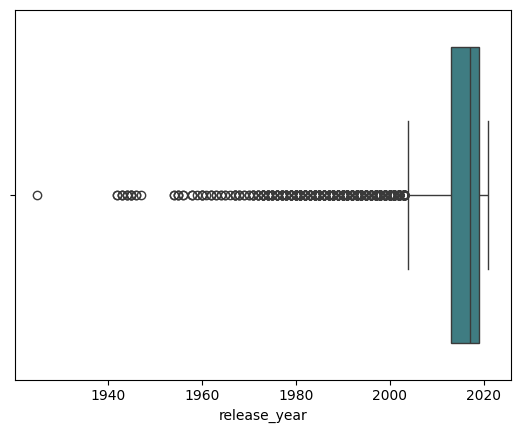

In [11]:
# display box plot
sns.boxplot(x=df['release_year'], palette = 'crest_r')
plt.show()

C:\Users\Rowaim Safdar\AppData\Local\Temp\ipykernel_20136\1441706560.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['date_added'],palette = 'crest_r')


<Axes: xlabel='date_added'>

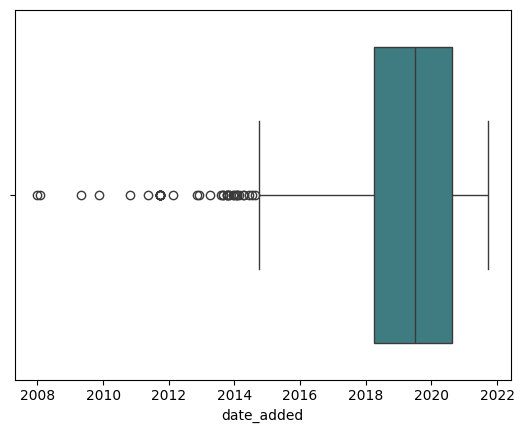

In [12]:
sns.boxplot(x=df['date_added'],palette = 'crest_r')

In [13]:
q1 = df['date_added'].quantile(0.25)
q3 = df['date_added'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['date_added'] = df['date_added'].clip(lower=lower_bound, upper=upper_bound)

In [14]:
q1 = df['release_year'].quantile(0.25)
q3 = df['release_year'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['release_year'] = df['release_year'].clip(lower=lower_bound, upper=upper_bound)

In [16]:
duration=df.groupby("type")['duration'].value_counts().to_frame()
duration.reset_index(level=['type'], inplace=True)

In [24]:
filt_movie = duration['type'] == 'Movie'
filt_show = duration['type'] == 'TV Show'
movie = duration[filt_movie]
show = duration[filt_show]

In [37]:
movie['duration'] = movie.index

C:\Users\Rowaim Safdar\AppData\Local\Temp\ipykernel_20136\1897263612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration'] = movie.index


In [39]:
movie.loc[:,'duration'] = movie['duration'].str.replace("min","")
movie['duration']=movie['duration'].astype(int)
movie.head()

C:\Users\Rowaim Safdar\AppData\Local\Temp\ipykernel_20136\2713581099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie.loc[:,'duration'] = movie['duration'].str.replace("min","")
C:\Users\Rowaim Safdar\AppData\Local\Temp\ipykernel_20136\2713581099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration']=movie['duration'].astype(int)


,type,duration
duration,,
90 min,Movie,90
93 min,Movie,93
94 min,Movie,94
97 min,Movie,97
91 min,Movie,91


In [43]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [46]:
df['listed_in'].value_counts()

Dramas                          1599
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           773
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         385
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 252
Docuseries                       220
Anime Series                     174
International Movies             128
Reality TV                       120
TV Comedies                      119
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            53
TV Action & Adventure             39
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Anime Features                    21
Independent Movies                20
Classic & Cult TV                 20
Music & Musicals                  18
T

In [48]:
df.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [49]:
df.country.value_counts()

United States                             3638
India                                      972
United Kingdom                             418
Japan                                      243
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [56]:
df['country'] = df['country'].apply(lambda x : x.split(',')[0]

SyntaxError: incomplete input (1820906665.py, line 1)